In [552]:
import matplotlib.pyplot as plt

In [553]:
%matplotlib inline

In [554]:
import pandas as pd

In [555]:
import numpy as np

In [556]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

In [557]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [558]:
dados.shape

(365, 7)

In [559]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [560]:
# Verificar tipos de dados
print(dados.dtypes)

# Converter colunas de data (exemplo)
dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')

# Criar coluna numérica a partir da data (se necessário)
dados['data_num'] = dados['data'].astype('int64')

# Selecionar apenas colunas numéricas
dados_numericos = dados.select_dtypes(include=['number'])

# Calcular correlação
correlacao = dados_numericos.corr().round(4)
print(correlacao)

data           object
temp_media    float64
temp_min      float64
temp_max      float64
chuva         float64
fds             int64
consumo         int64
dtype: object
            temp_media  temp_min  temp_max   chuva     fds  consumo  data_num
temp_media      1.0000    0.8628    0.9225  0.0244 -0.0508   0.5746   -0.0986
temp_min        0.8628    1.0000    0.6729  0.0986 -0.0595   0.3925   -0.1701
temp_max        0.9225    0.6729    1.0000 -0.0493 -0.0403   0.6427   -0.0689
chuva           0.0244    0.0986   -0.0493  1.0000  0.0016  -0.1938    0.0075
fds            -0.0508   -0.0595   -0.0403  0.0016  1.0000   0.5060   -0.0060
consumo         0.5746    0.3925    0.6427 -0.1938  0.5060   1.0000    0.0435
data_num       -0.0986   -0.1701   -0.0689  0.0075 -0.0060   0.0435    1.0000


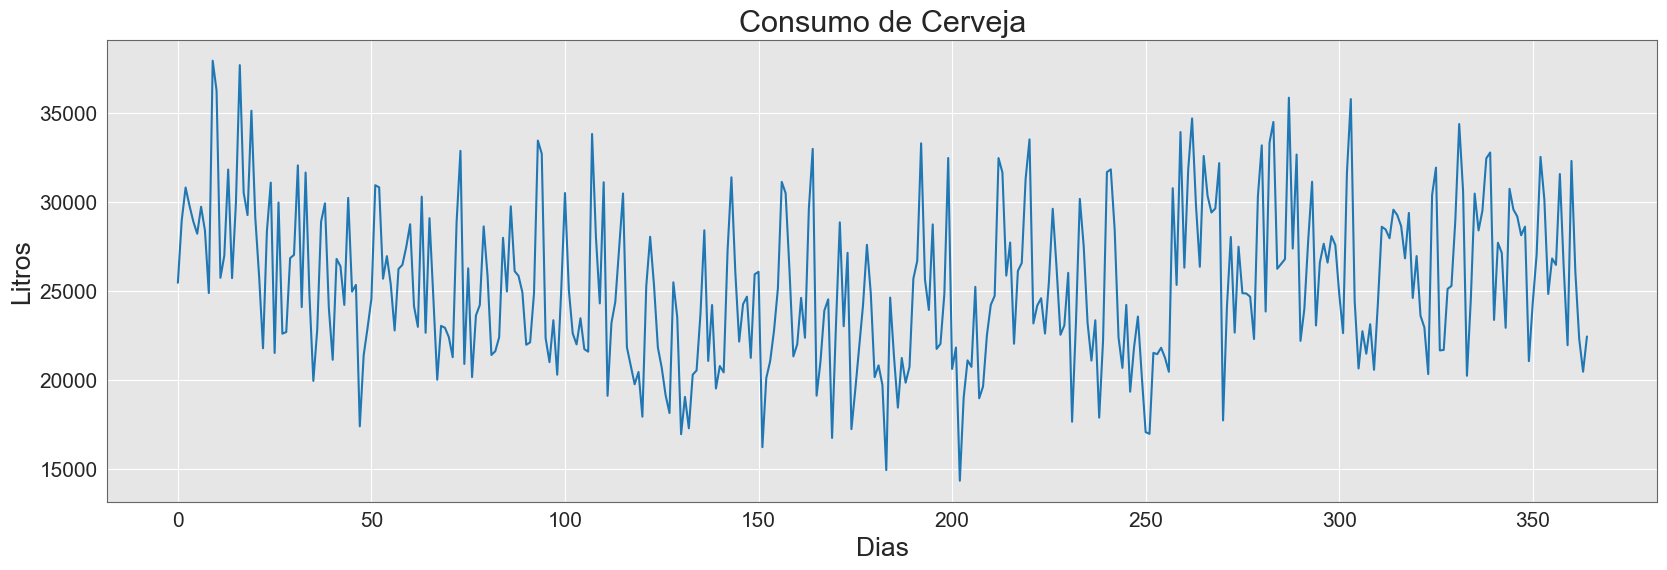

In [561]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Consumo de Cerveja', fontsize=22)
ax.set_ylabel('Litros', fontsize=19)
ax.set_xlabel('Dias', fontsize=19)
ax = dados['consumo'].plot(fontsize=15)

In [562]:
import seaborn as sns

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

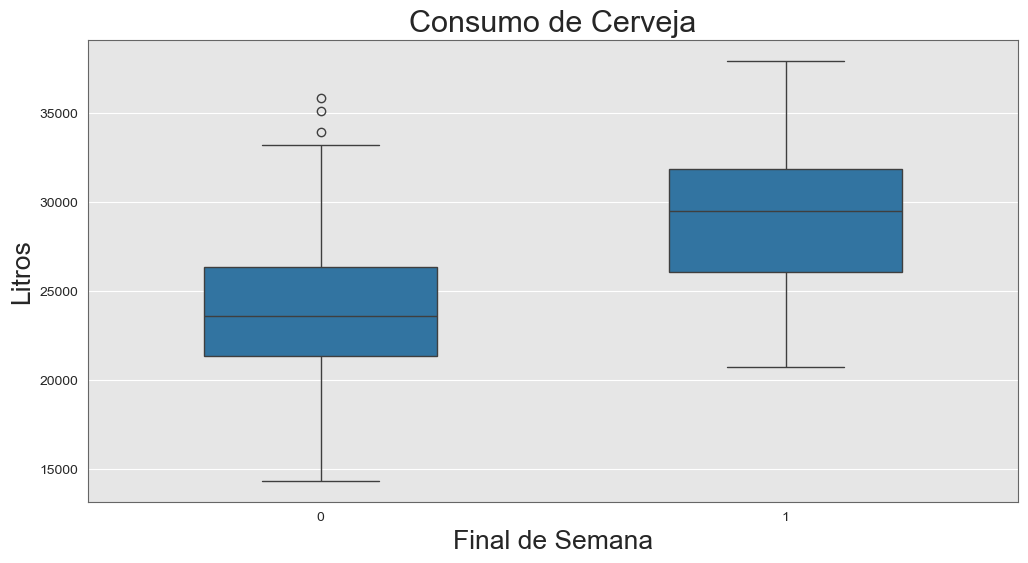

In [563]:
ax = sns.boxplot(y = 'consumo', x= 'fds', data=dados, orient= 'v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=22)
ax.set_ylabel('Litros', fontsize=19)
ax.set_xlabel('Final de Semana', fontsize=19)
ax

C:\Users\clayton.silva\AppData\Local\Temp\ipykernel_25104\3381957471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='consumo', ylabel='Consumo de cerveja'>

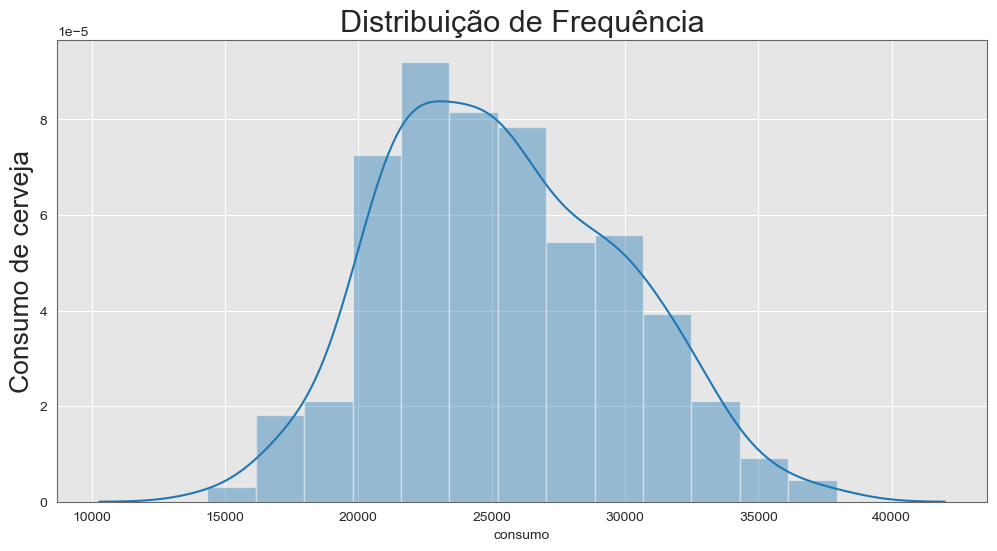

In [564]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=22)
ax.set_ylabel('Consumo de cerveja', fontsize=19)
ax

<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='consumo', ylabel='Consumo de cerveja'>

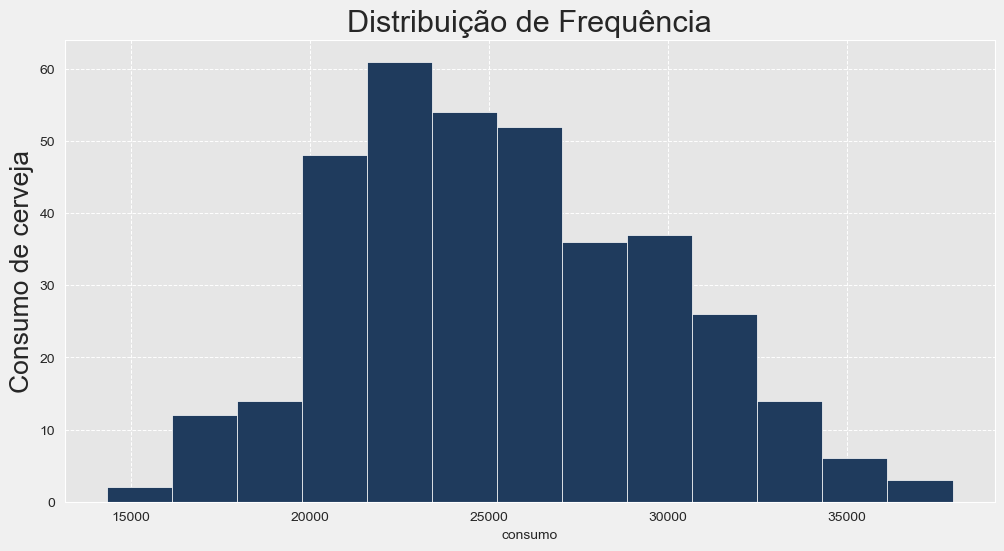

In [565]:
# Configurar o estilo do Seaborn para fundo cinza claro
sns.set_style("darkgrid", {"axes.facecolor": ".9"})  # .9 = cinza muito claro

# Criar o gráfico
ax = sns.histplot(
    dados['consumo'],
    color='#1f3b5d',         # Azul escuro
    edgecolor='white',       # Borda branca para destacar
    linewidth=0.5,           # Espessura da borda
    alpha=1,                 # Opacidade total
    kde=False                # Remove a linha de densidade
)

# Ajustes estéticos adicionais
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=22)
ax.set_ylabel('Consumo de cerveja', fontsize=19)

# Ajustar cores do grid
ax.grid(color='white', linestyle='--', linewidth=0.7)

# Opcional: fundo da figura também em cinza
ax.figure.set_facecolor('#f0f0f0')

ax

C:\Users\clayton.silva\AppData\Local\Temp\ipykernel_25104\4072467547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(


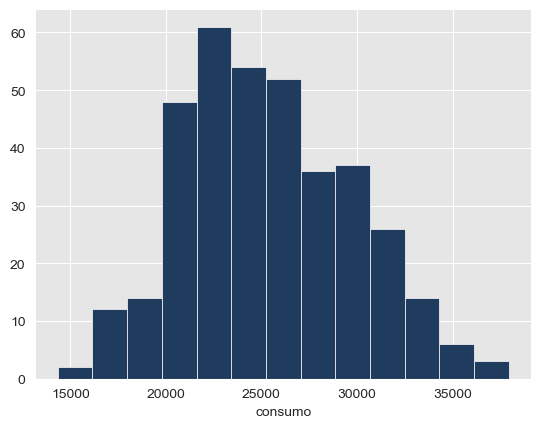

In [566]:
ax = sns.distplot(
    dados['consumo'],
    hist_kws={
        'color': '#1f3b5d',
        'edgecolor': 'white',
        'linewidth': 0.5,
        'alpha': 1
    },
    kde=False
)

<Axes: title={'center': 'Distribuição de Frequência'}, xlabel='Consumo de cerveja', ylabel='Densidade'>

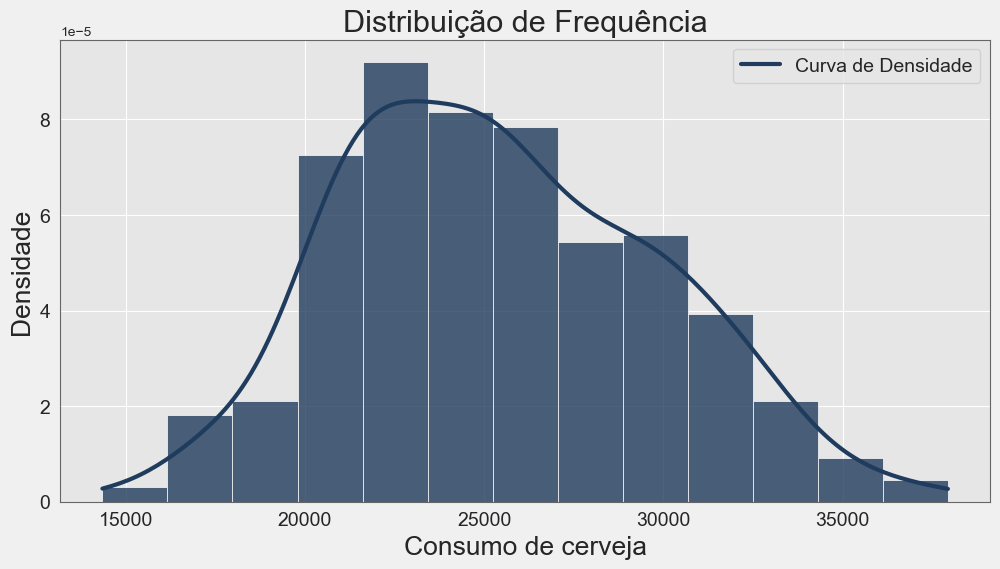

In [567]:
# Configurar o estilo
sns.set_style("darkgrid", {
    "axes.facecolor": ".9",          # Fundo cinza claro
    "grid.color": "white",           # Linhas do grid brancas
    "axes.edgecolor": ".4"           # Borda do gráfico cinza
})

# Criar o gráfico
ax = sns.histplot(
    dados['consumo'],
    color='#1f3b5d',                 # Azul escuro para as barras
    edgecolor='white',                # Borda branca
    linewidth=0.5,
    alpha=0.8,
    kde=True,                        # Adiciona a curva de densidade
    stat='density',                  # Para alinhar escala do KDE
    line_kws={'color': '#c72e29',    # Vermelho para a curva
              'linewidth': 3,
              'label': 'Curva de Densidade'}
)

# Ajustes finais
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência', fontsize=22)
ax.set_ylabel('Densidade', fontsize=19)
ax.set_xlabel('Consumo de cerveja', fontsize=19)
ax.legend(prop={'size': 14})

# Fundo da figura
ax.figure.set_facecolor('#f0f0f0')

# Ajustar ticks
ax.tick_params(axis='both', which='major', labelsize=14)

ax

C:\Users\clayton.silva\AppData\Local\Temp\ipykernel_25104\1674129230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(


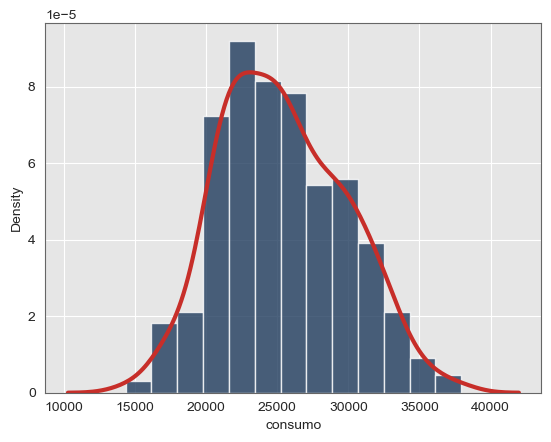

In [568]:
ax = sns.distplot(
    dados['consumo'],
    hist_kws={
        'color': '#1f3b5d',
        'edgecolor': 'white',
        'alpha': 0.8
    },
    kde_kws={
        'color': '#c72e29',
        'linewidth': 3,
        'label': 'Curva de Densidade'
    }
)

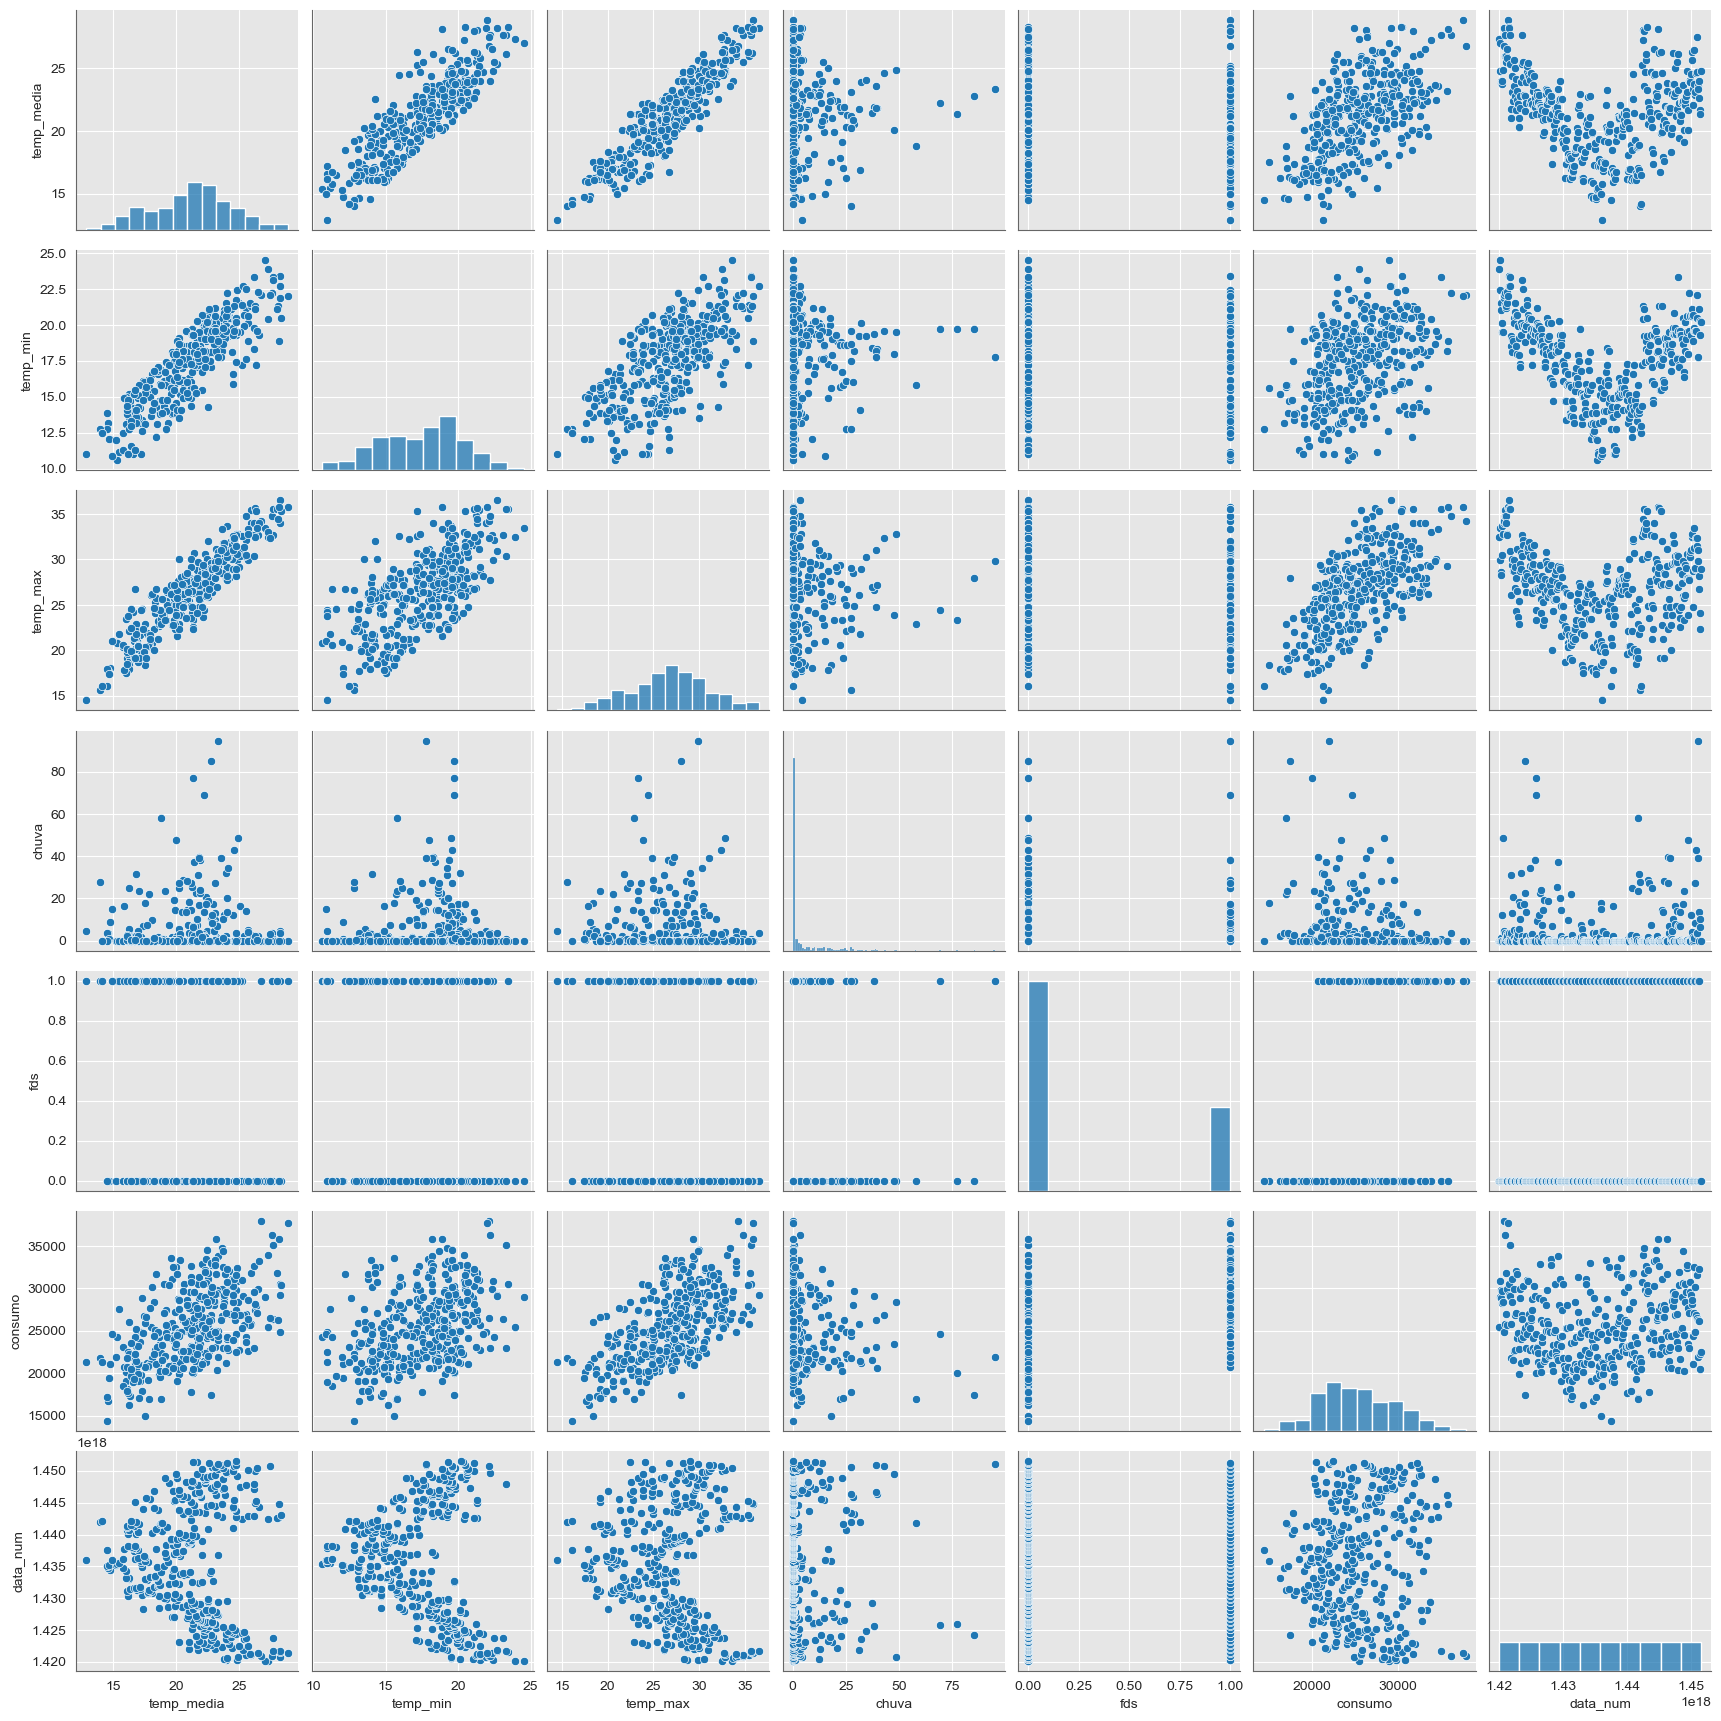

In [569]:
ax = sns.pairplot(dados)

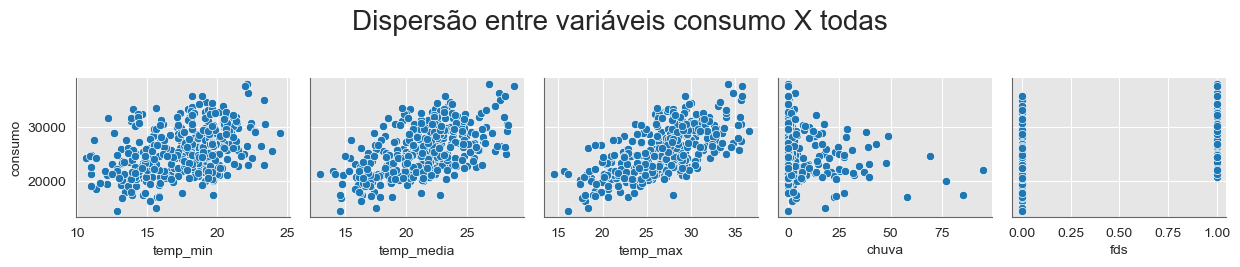

In [570]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds']
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

In [571]:
# Para eixos X compartilhados
ax.set(xlabel='Variáveis Explicativas', ylabel='Consumo de Cerveja')

# Ajustar ainda mais o espaçamento
plt.subplots_adjust(hspace=0.3, wspace=0.3)

<Figure size 640x480 with 0 Axes>

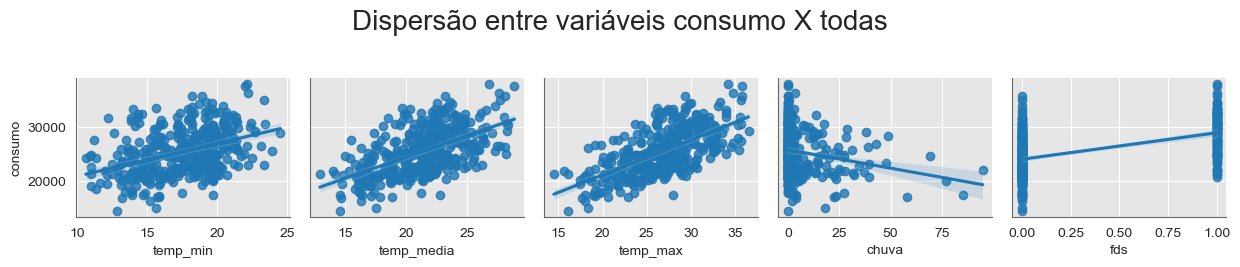

In [572]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg'
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

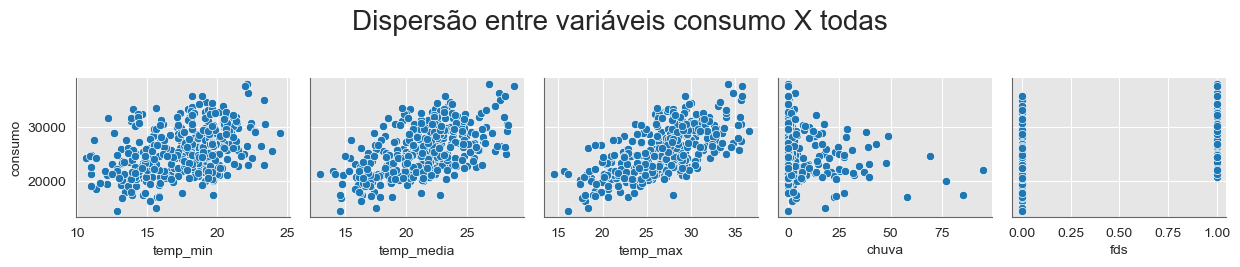

In [573]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds']
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

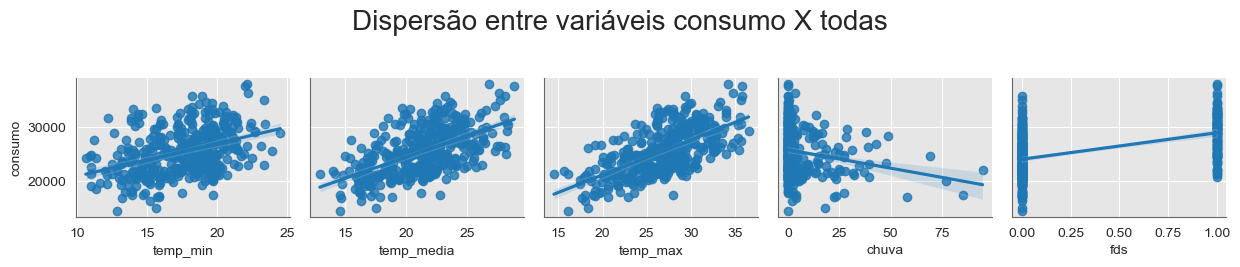

In [574]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg'
)

# Ajustar o título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.05  # Ajuste vertical para cima da grade de gráficos
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

Text(0.5, 1.2, 'Dispersão entre variáveis consumo X todas')

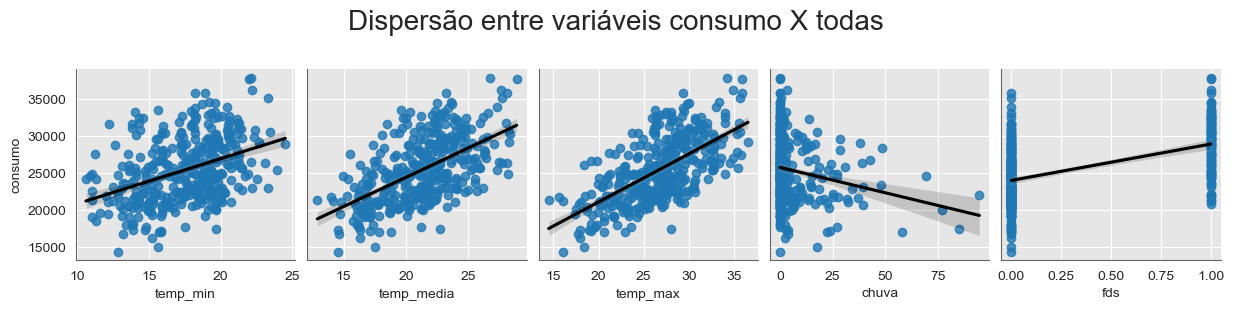

In [575]:
ax = sns.pairplot(
    dados,
    y_vars='consumo',
    x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'],
    kind='reg',
    plot_kws={
        'line_kws': {'color': 'black'},  # Linha de regressão preta
        'scatter_kws': {'color': '#1f77b4'}  # Opcional: cor dos pontos
    }
)

# Título principal
ax.figure.suptitle(
    'Dispersão entre variáveis consumo X todas',
    fontsize=20,
    y=1.2
)

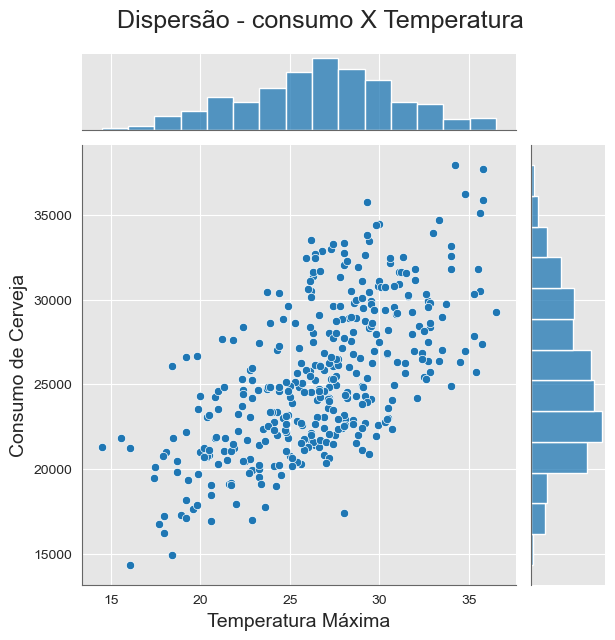

In [576]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados)
ax.fig.suptitle('Dispersão - consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

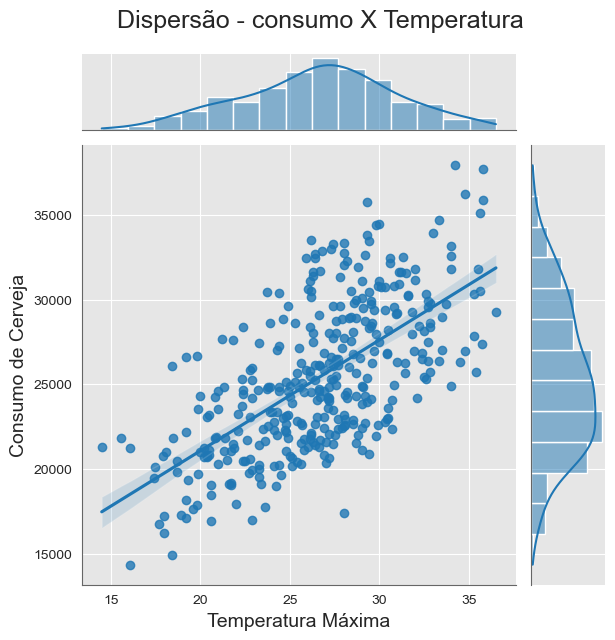

In [577]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind="reg")
ax.fig.suptitle('Dispersão - consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize=14)
ax

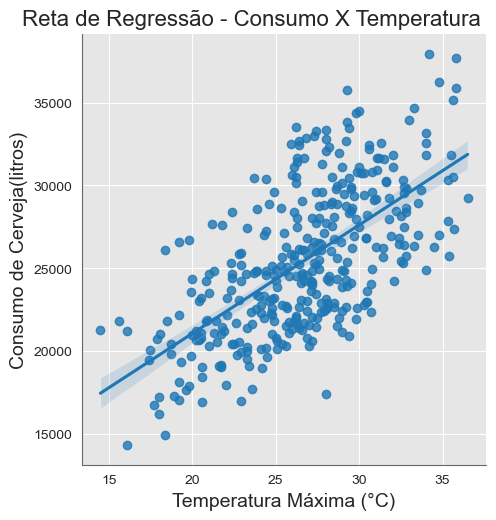

In [578]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle("Reta de Regressão - Consumo X Temperatura", fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja(litros)", fontsize=14)
ax

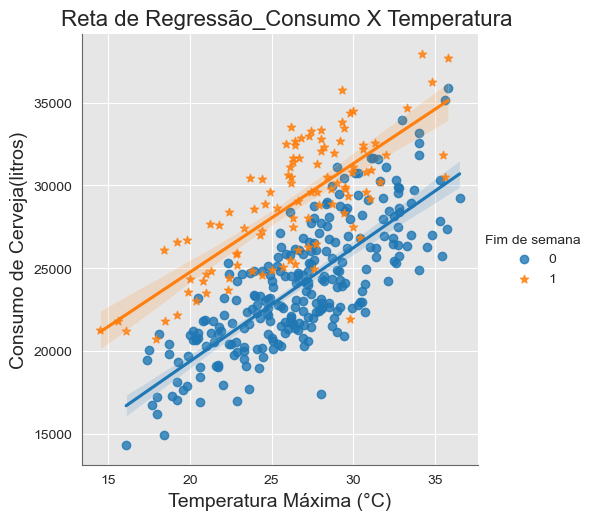

In [579]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Reta de Regressão_Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja(litros)", fontsize=14)
ax.add_legend(title="Fim de semana")
ax

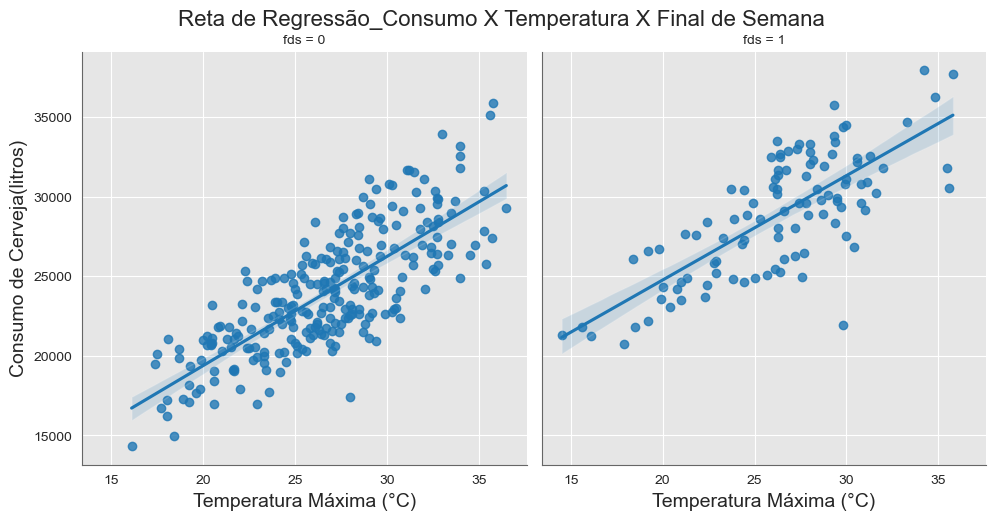

In [580]:
ax = sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")
ax.fig.suptitle('Reta de Regressão_Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja(litros)", fontsize=14)
ax

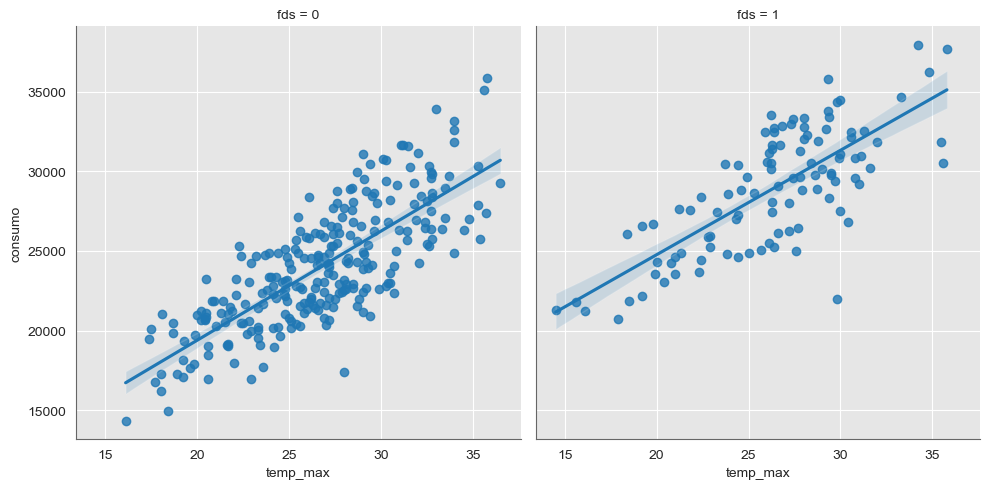

In [581]:
import seaborn as sns
sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")

In [582]:
from sklearn.model_selection import train_test_split

In [583]:
y = dados['consumo']

In [584]:
X = dados[['temp_max', 'chuva', 'fds']]

In [585]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2811)

In [586]:
X_train.shape

(255, 3)

In [587]:
X_test.shape

(110, 3)

In [588]:
X_train.shape[0] + X_test.shape[0]

365

In [589]:
X.shape[0] *0.3

109.5

In [590]:
X.shape[0] * 0.7

255.49999999999997

In [591]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [592]:
modelo = LinearRegression()

In [593]:
modelo.fit(X_train, y_train)


LinearRegression()

In [594]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [595]:
y_previsto = modelo.predict(X_test)

In [596]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


In [597]:
entrada = X_test[0:1]

In [598]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [599]:
modelo.predict(entrada)[0]

26094.901775262017

In [600]:
import pandas as pd

entrada = pd.DataFrame([[temp_max, chuva, fds]], columns=['temp_max', 'chuva', 'fds'])  # Substitua pelos nomes corretos!
modelo.predict(entrada)[0]

38742.53003734186

In [601]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


C:\Users\clayton.silva\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [602]:
import pandas as pd

entrada = pd.DataFrame([[temp_max, chuva, fds]], columns=['temp_max', 'chuva', 'fds'])  # Substitua pelos nomes corretos!
modelo.predict(entrada)[0]

38742.53003734186

In [603]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


C:\Users\clayton.silva\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [604]:
modelo.intercept_

5951.9763393124485

In [605]:
type(modelo.intercept_)

numpy.float64

In [606]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [607]:
type(modelo.coef_)

numpy.ndarray

In [608]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [609]:
index=['intercepto', 'Temperatura Máxima litros', 'Chuva (mm)litros', 'Final de Semana litros']

In [610]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
intercepto,5951.976339
Temperatura Máxima litros,684.736759
Chuva (mm)litros,-60.782435
Final de Semana litros,5401.083339


In [611]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

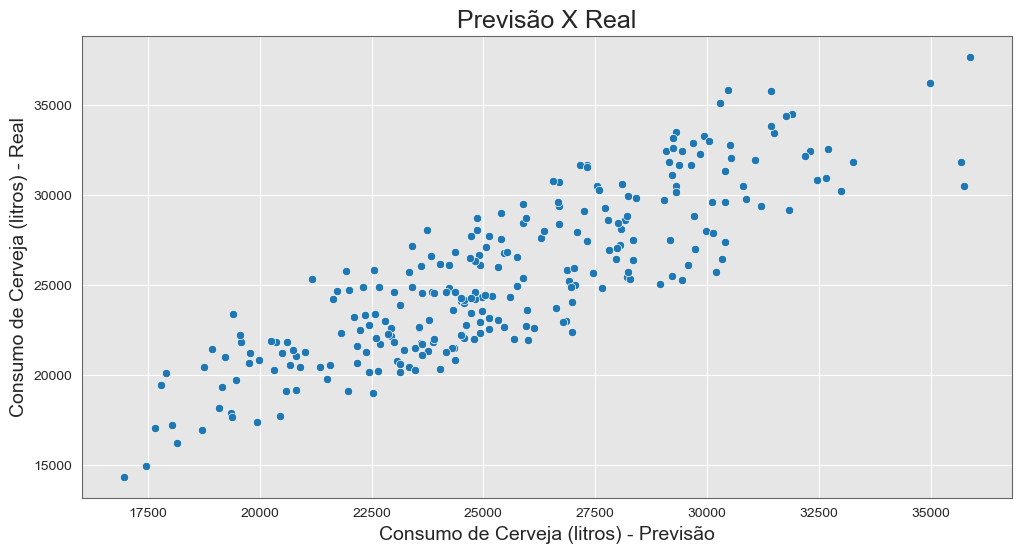

In [612]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)  # Método correto
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [613]:
residuo = y_train - y_previsto_train

In [614]:
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

<Axes: title={'center': 'Resíduo X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Residuos'>

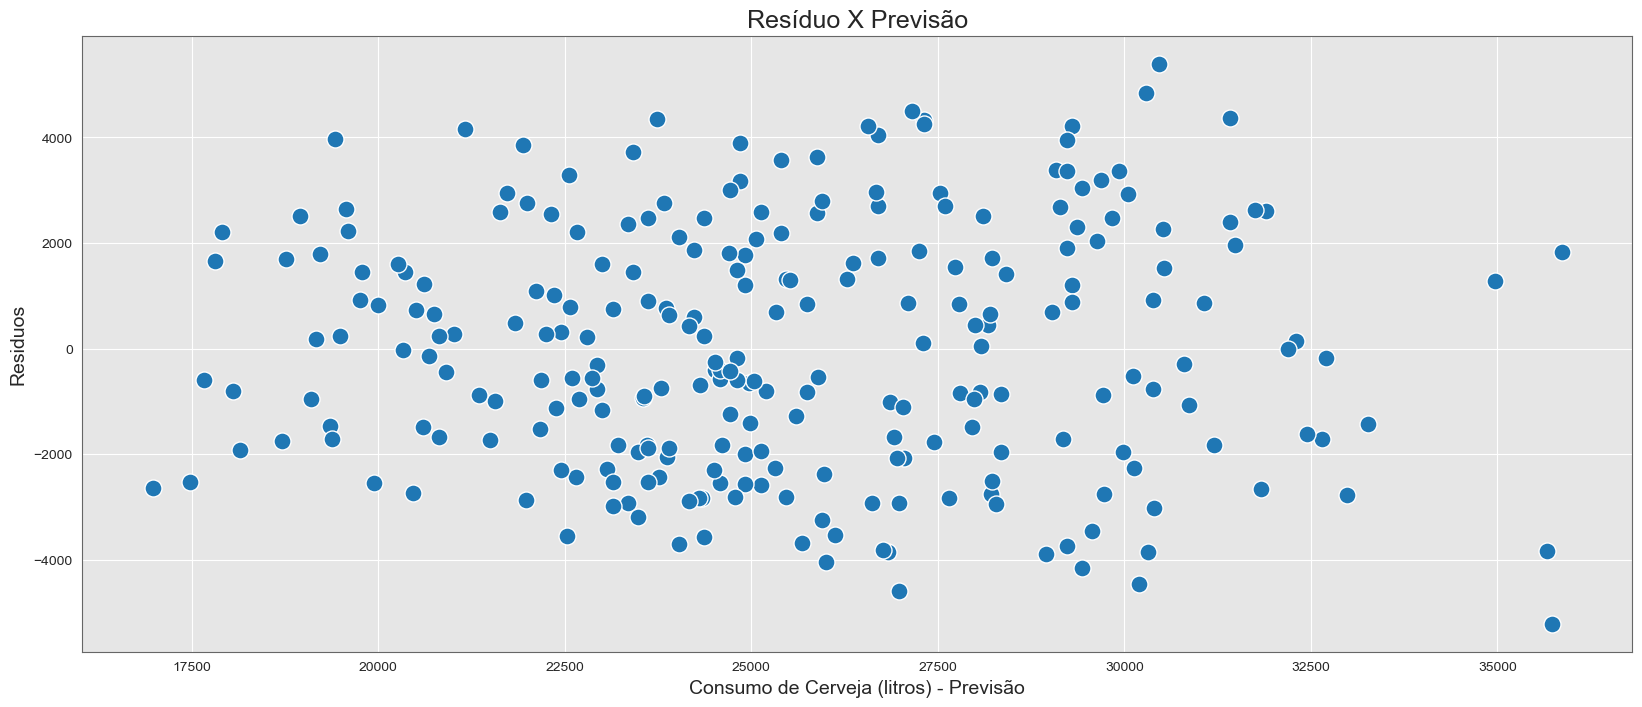

In [615]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo X Previsão',fontsize=18)  
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)
ax

<Axes: title={'center': 'Resíduo X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Residuos²'>

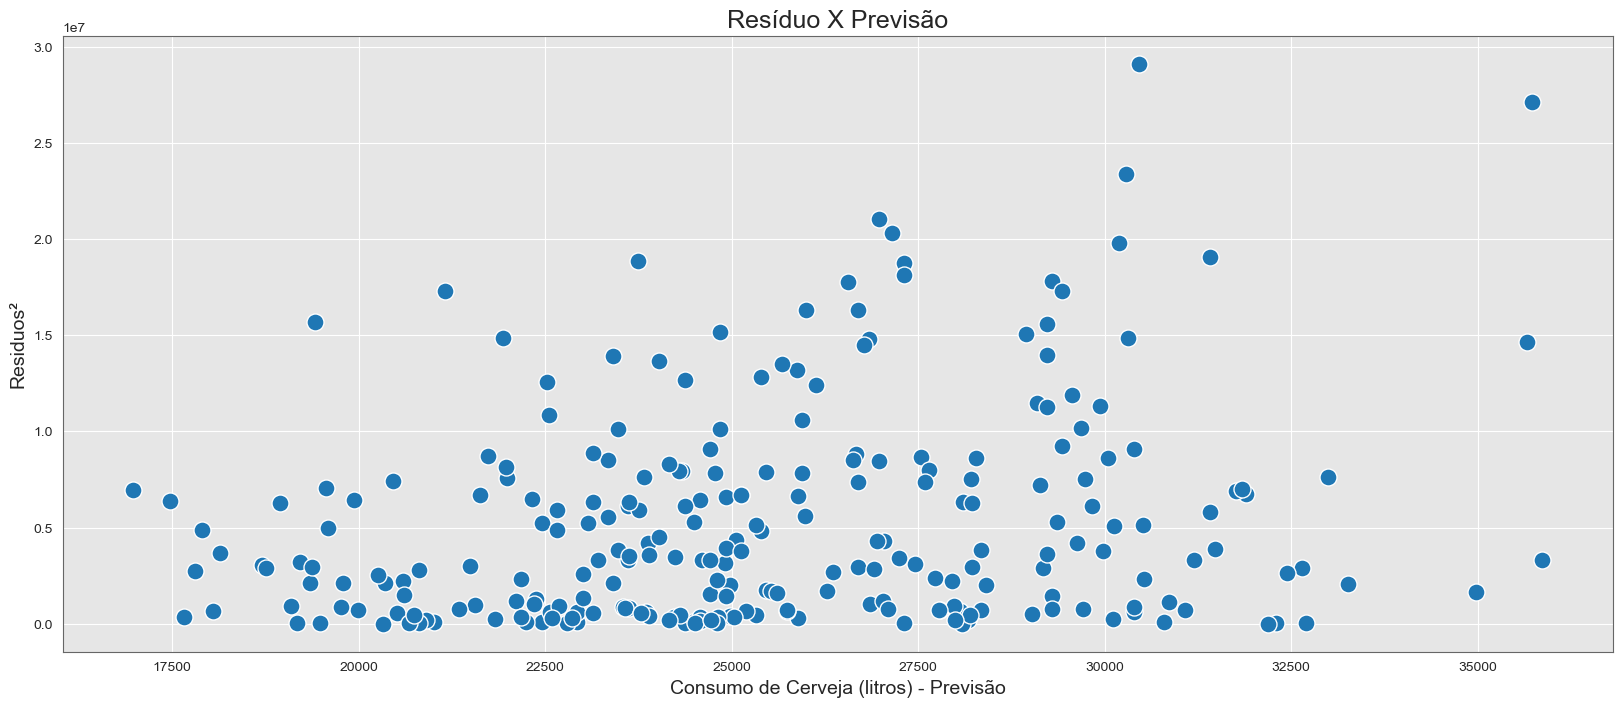

In [616]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo X Previsão',fontsize=18)  
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Residuos²', fontsize=14)
ax

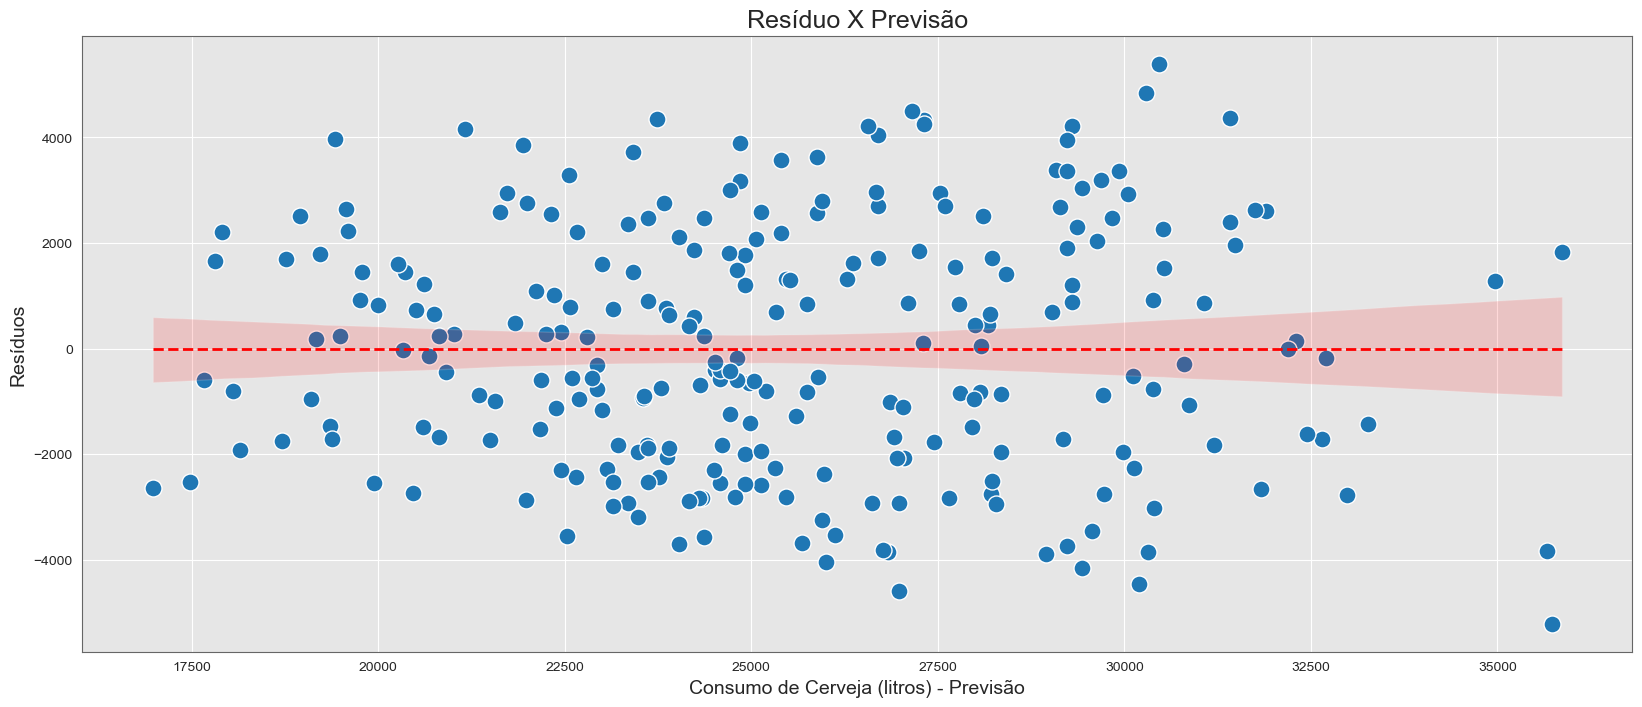

In [617]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
sns.regplot(  # Adiciona a curva de regressão
    x=y_previsto_train, 
    y=residuo, 
    scatter=False,  # Não plota os pontos novamente
    color='red',    # Cor da linha
    line_kws={'lw': 2, 'ls': '--'}  # Estilo da linha
)

ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()  # Exibe o gráfico

<Axes: ylabel='consumo'>

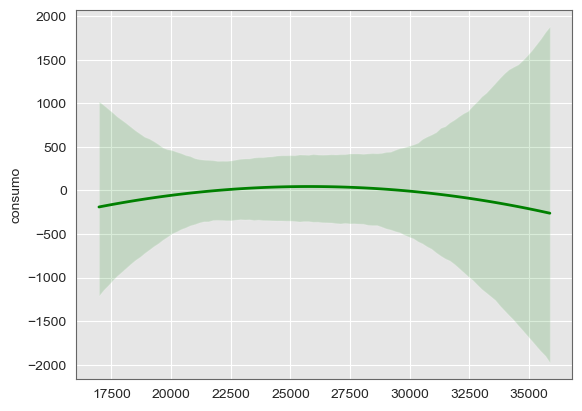

In [618]:
sns.regplot(
    x=y_previsto_train, 
    y=residuo, 
    scatter=False,
    order=2,  # Grau do polinômio (ex: 2 para quadrático)
    color='green',
    line_kws={'lw': 2}
)

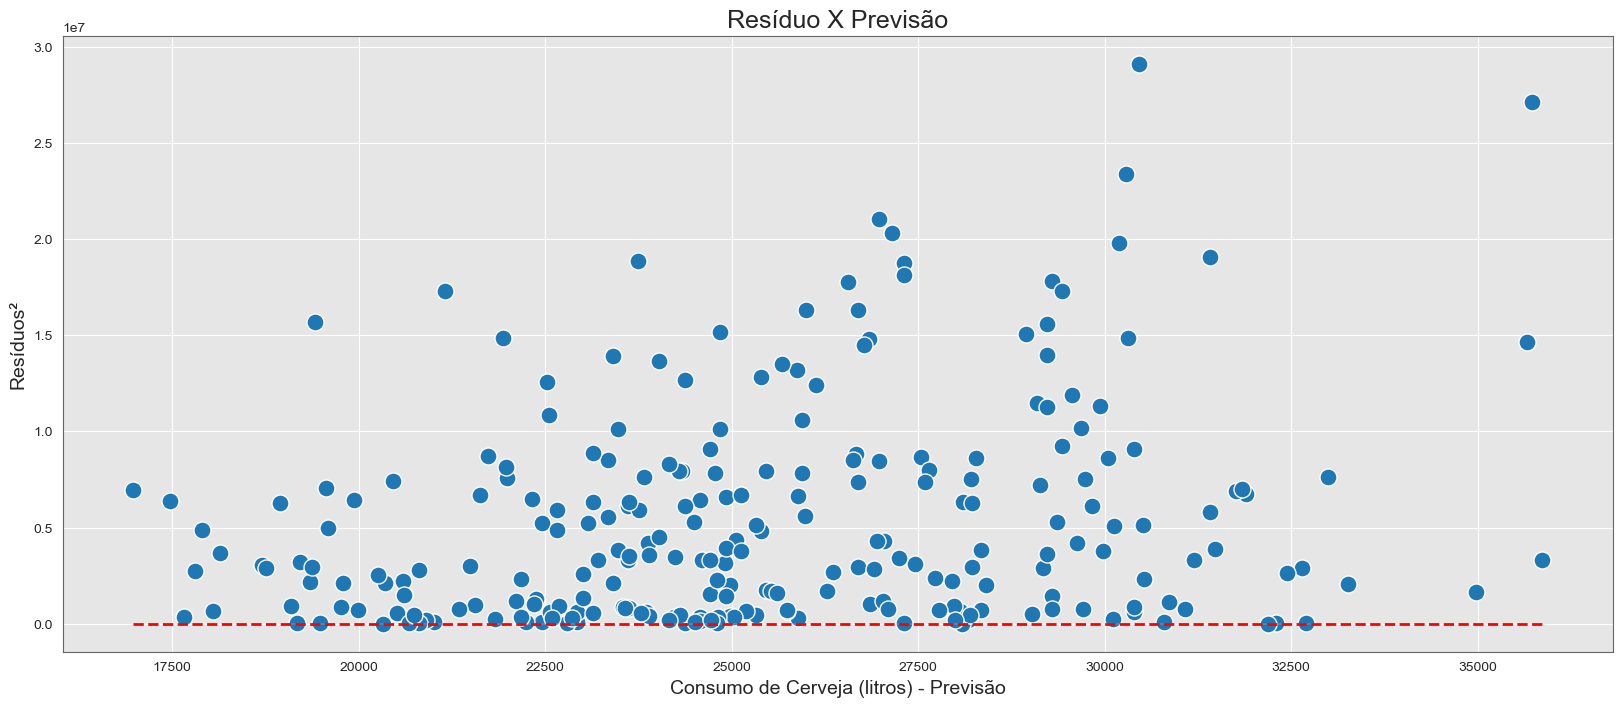

In [619]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
sns.regplot(  # Adiciona a curva de regressão
    x=y_previsto_train, 
    y=residuo, 
    scatter=False,  # Não plota os pontos novamente
    color='red',    # Cor da linha
    line_kws={'lw': 2, 'ls': '--'}  # Estilo da linha
)

ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduo X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
plt.show()  # Exibe o gráfico

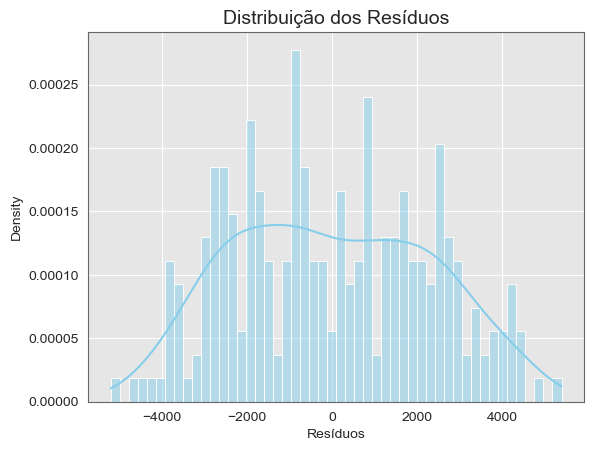

In [620]:
# Para manter o estilo do gráfico original (histograma + KDE):
ax = sns.histplot(residuo, bins=50, kde=True, stat='density', color='skyblue')
ax.set_title('Distribuição dos Resíduos', fontsize=14)
ax.set_xlabel('Resíduos')
plt.show()

In [621]:
X2 = dados[['temp_media', 'chuva', 'fds']]

In [622]:
X2_train, X2_test, y2_train, y2_test = train = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [623]:
modelo_2 = LinearRegression()

In [624]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [625]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [626]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


In [627]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [629]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Temp. Média
R² = 0.66


In [632]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temp. Máxima
R² = 0.69


In [635]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ["EQM", "REQM", "R²"], columns=["Métricas"])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


In [636]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ["EQM", "REQM", "R²"], columns=["Métricas"])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69
